# Hands-on session 1: Neo basics

These exercises cover the basics introduced in Tutorial 1

## Preparation: Download public ephys dataset
On Linux you can download the publicly available dataset via the command below. On other systems, please download the files manually from [l101210-001.ns2](https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.ns2), [l101210-001.nev](https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.nev) and [l101210-001.ns5](https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.ns5) and save them in the same folder as this notebook.


In [2]:
#!wget -O reach_to_grasp_material/l101210-001.ns2 https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.ns2
#!wget -O reach_to_grasp_material/l101210-001.nev https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.nev
#!wget -O reach_to_grasp_material/l101210-001.ns5 https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.ns5


## Exercise 1: Exploring an ephys dataset

1. Load the dataset you just downloaded with Neo. Which IO seems suitable for this dataset? Hint: The dataset contains multiple files with different endings. When loading, do not specify these extensions.
2. How many continuous recording parts (segments) does this dataset contain?
3. How many channels were recorded in this dataset and at what sampling rates?
4. How many spiketrains does this dataset contain?

### Your solution

In [3]:
import neo
io = neo.io.BlackrockIO('reach_to_grasp_material/l101210-001')
block = io.read_block()

print(f'Number of segments: {len(block.segments)}')
for anasig in block.segments[0].analogsignals:
    print(f'Number of channels with sampling rate {anasig.sampling_rate}: {anasig.shape[-1]}')
print(f'Number of spiketrains: {len(block.segments[0].spiketrains)}')

Number of segments: 1
Number of channels with sampling rate 1000.0 Hz: 6
Number of channels with sampling rate 30000.0 Hz: 96
Number of spiketrains: 218


## Exercise 2: Extracting data for visualization
1. Visualize the channels 10 to 19 of the `AnalogSignal` with the highest temporal resolution. 
2. Add axis labels, title and legend based on metadata provided by the `AnalogSignal`. Check the `array_annotations` to label each channel.

### Your solution

Text(0.5, 1.0, 'nsx5')

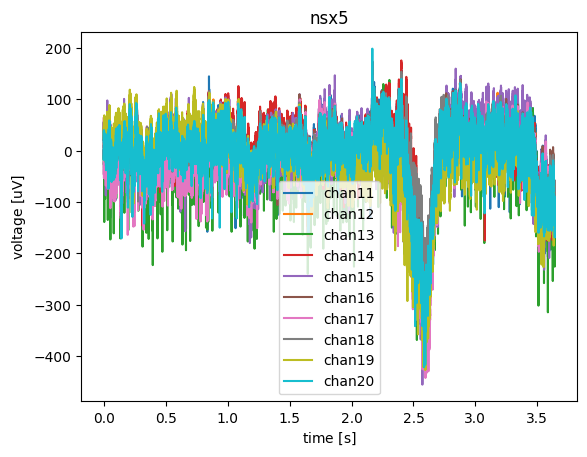

In [4]:
import matplotlib.pyplot as plt
# identify analogsignal with 30kHz temporal resolution
anasig = block.segments[0].analogsignals[1]
fig = plt.figure()
ax = plt.gca()
ax.plot(anasig.times, anasig.magnitude[:,10:20])

# adding titles and labels
ax.set_ylabel(f'voltage [{anasig.dimensionality.latex}]')
ax.set_xlabel(f'time [{anasig.times.dimensionality.latex}]')
ax.legend(anasig.array_annotations['channel_names'][10:20], loc='best')
ax.set_title(anasig.name)

### Bonus Exercise 2a: Extended overview

To get an overview of all channels it helps to plot each channel with an offset to avoid overlapping signal traces. Implement this by first normalizing the signal amplitude of each channel. For this first subtract the mean of each trace and then divide this rereferenced trace by it's standard deviation. Take advantage of the inherited numpy methods `mean` and `std` of an AnalogSignal.

Plot each normalized trace with an offset corresponding to double its channel id, i.e. a vertical offset of 20 for the trace labelled with `channel_id` 10.
Save the figure in the `svg` format. What is the size of the resulting file?

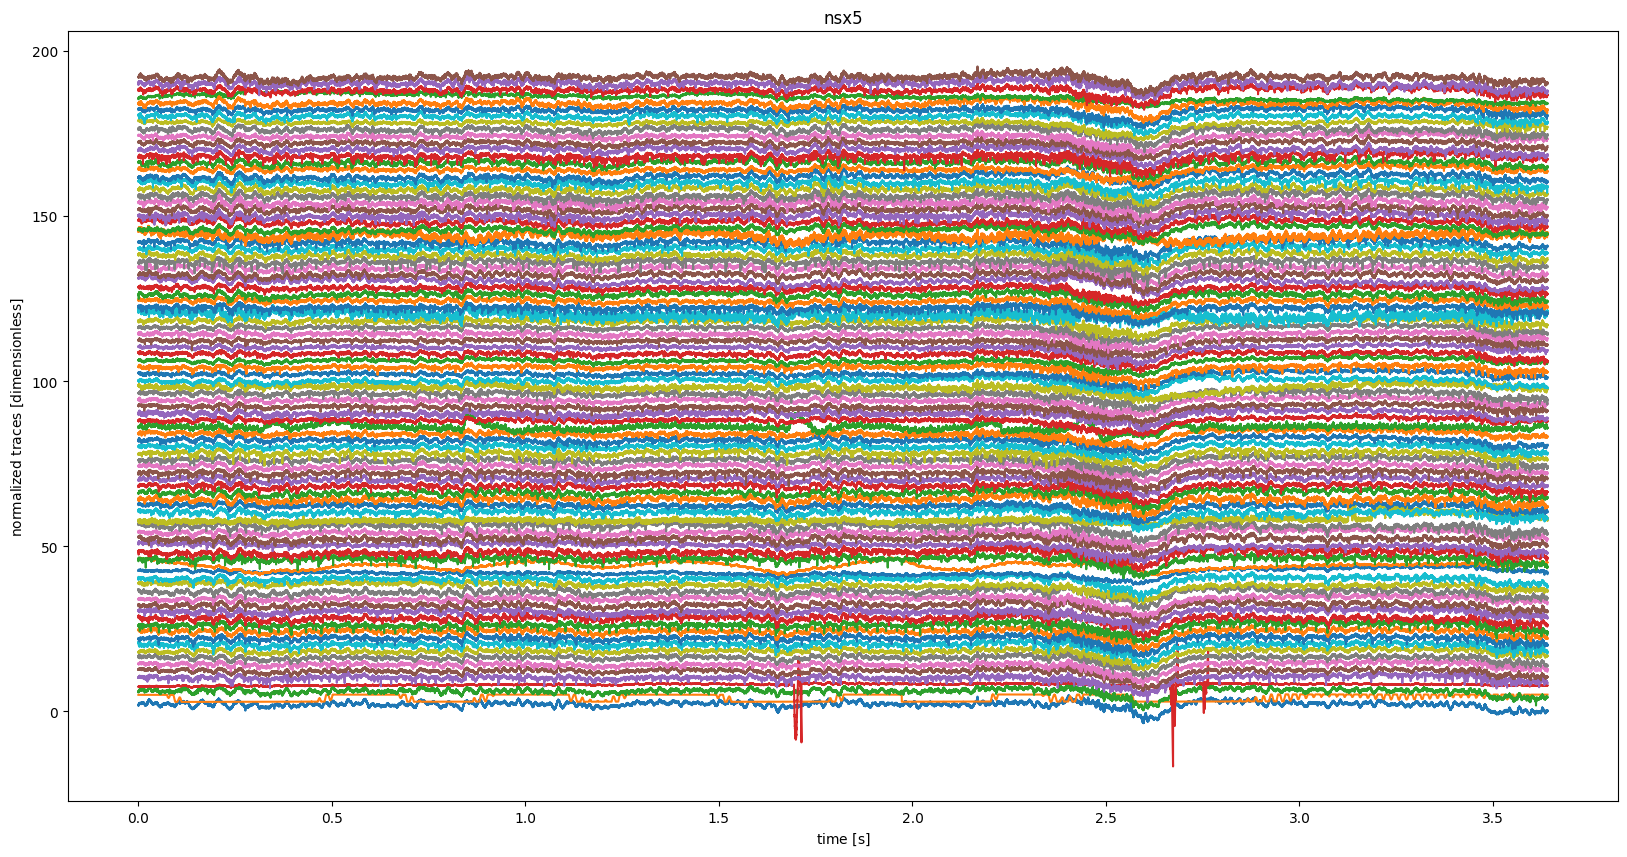

In [5]:
# subtract the mean of each trace
norm_anasig = anasig - anasig.mean(axis=0)
# divide each signal by its standard deviation
norm_anasig = norm_anasig / norm_anasig.std(axis=0)


# create large figure and plot all traces with an offset according to double the channel_id
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(norm_anasig.times, norm_anasig.magnitude + norm_anasig.array_annotations['channel_ids'].astype(int)*2)

# adding titles and labels
ax.set_ylabel(f'normalized traces [{norm_anasig.dimensionality.latex}]')
ax.set_xlabel(f'time [{norm_anasig.times.dimensionality.latex}]')
ax.set_title(norm_anasig.name)

# saving figure to svg file
plt.savefig('hands_on_1-overview.svg', format='svg')

In [6]:
ls -lh hands_on_1-overview.svg

-rw-rw-r-- 1 denker denker 54M Dez  5 22:51 hands_on_1-overview.svg


### Bonus Exercise 2b: Downsampling signals

The plot and svg file generated in the previous step contains information about all data points and consumes therefore more memory than needed to illustrate the traces. To improve this reduce the number of samples while preserving the shapes of the traces using the `downsample` method. Generate another overview plot with the downsampled signal and compare their svg file sizes.

Note: Use only moderate downsampling factors (<=8) to avoid instabilities in the downsampling procedure. For higher downsampling factors downsample multiple times with lower downsampling factors.

In [7]:
downsampling_factor = 6
light_anasig = norm_anasig.downsample(downsampling_factor)

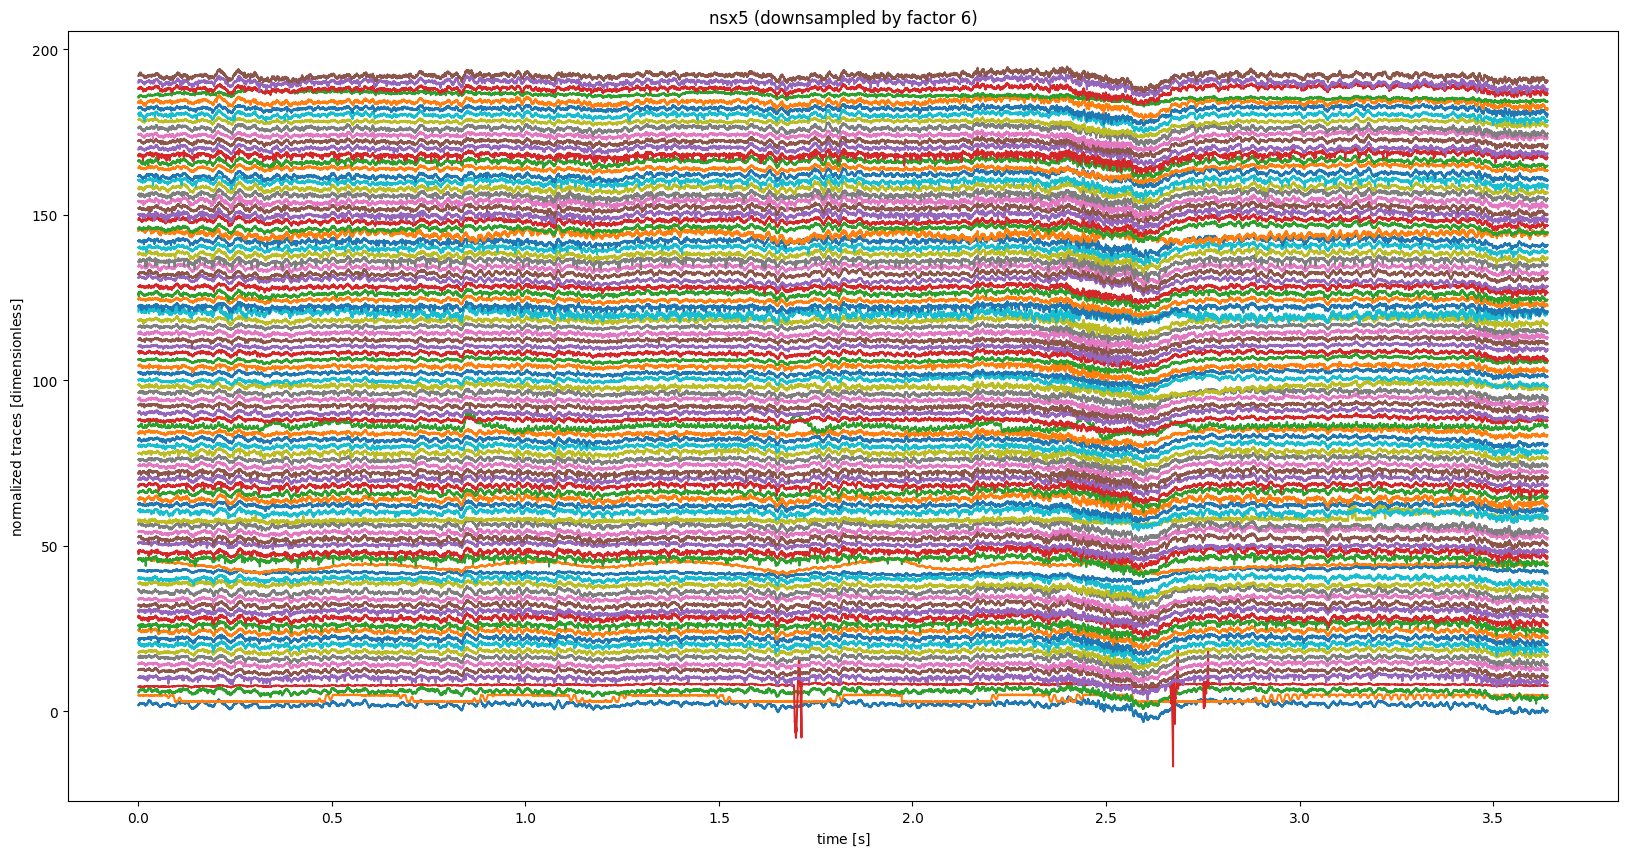

In [8]:
# create large figure and plot all traces with an offset according to double the channel_id
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(light_anasig.times, light_anasig.magnitude + light_anasig.array_annotations['channel_ids'].astype(int)*2)

# adding titles and labels
ax.set_ylabel(f'normalized traces [{light_anasig.dimensionality.latex}]')
ax.set_xlabel(f'time [{light_anasig.times.dimensionality.latex}]')
ax.set_title(light_anasig.name + f' (downsampled by factor {downsampling_factor})')

plt.savefig('hands_on_1-downsample.svg', format='svg')

In [9]:
ls -lh hands_on_1-downsample.svg

-rw-rw-r-- 1 denker denker 25M Dez  5 22:51 hands_on_1-downsample.svg


## Exercise 3: Saving the dataset using NIX
- Save the complete dataset in a new file named `l101210-001.nix`
- What is the size of the resulting nix file?

### Your solution

In [10]:
filename = 'l101210-001-test.nix'
with neo.io.NixIO(filename, 'ow') as io:
    io.write_block(block)

In [11]:
ls -lh l101210-001-test.nix

-rw-rw-r-- 1 denker denker 47M Dez  5 22:51 l101210-001-test.nix
